In [ ]:
pip install shifterator

In [ ]:
pip install compcor

In [ ]:
import nltk
import pandas as pd
import nltk
import spacy
from collections import Counter
import shifterator as sh
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Step 1: Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load("en_core_web_sm")
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
df_bible = pd.read_csv('/content/Bible.csv')
df_gita = pd.read_csv('/content/Gita.csv')
df_quran = pd.read_csv('/content/Quran.csv')

In [ ]:
df_gita.head()

,Chapter,Verse,Text
0,1,1,"DHRITARASHTRA: O Sanjaya, tell me what happen..."
1,1,2,SANJAYA: Having surveyed the forces of the Pa...
2,1,3,"O my teacher, look at this mighty army of the ..."
3,1,4,There are heroic warriors and great archers wh...
4,1,5,"Dhrishtaketu, Chekitana, the valiant king of K..."


In [ ]:
# Function for preprocessing text
old_english_stopwords = {
    "thou", "thee", "thy", "thine", "ye", "your", "me", "him", "her", "it", "us", "them",
    "art", "hast", "dost", "hath", "is", "was", "were", "be", "beest", "will", "shall",
    "unto", "withal", "by", "of", "in", "on", "at", "from", "through", "before", "after",
    "beneath", "beside", "within", "and", "or", "but", "if", "for", "nor", "yet", "also",
    "lo", "behold", "thus", "verily", "hence", "hither", "thence", "o", "alas", "sooth",
    "wherefore", "whence", "hie", "nay", "yea", "anon", "alway", "afore"
}


def preprocess_text(text):
    tokens = word_tokenize(text.lower())  # Convert text to lowercase
    stop_words = set(stopwords.words('english'))  # Modern stopwords from NLTK
    stop_words.update(old_english_stopwords)  # Add old English stopwords

    # Remove stopwords and single letter words (e.g., 'o', 's')
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words and len(word) > 1]

    # Lemmatize using SpaCy
    doc = nlp(" ".join(tokens))
    lemmatized_tokens = [token.lemma_ for token in doc]

    return lemmatized_tokens

# Apply preprocessing to the text columns of the dataframes
df_bible['processed'] = df_bible['t'].apply(preprocess_text)
df_gita['processed'] = df_gita['Text'].apply(preprocess_text)
df_quran['processed'] = df_quran['Verse'].apply(preprocess_text)

# Step 4: Calculate word frequencies for each dataframe
def get_word_frequencies(df):
    word_frequencies = Counter()
    for text in df['processed']:
        word_frequencies.update(text)
    return word_frequencies

word_freq_bible = get_word_frequencies(df_bible)
word_freq_gita = get_word_frequencies(df_gita)
word_freq_quran = get_word_frequencies(df_quran)

In [ ]:
import collections.abc
collections.Mapping = collections.abc.Mapping

/usr/local/lib/python3.10/dist-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


<Figure size 1400x700 with 0 Axes>

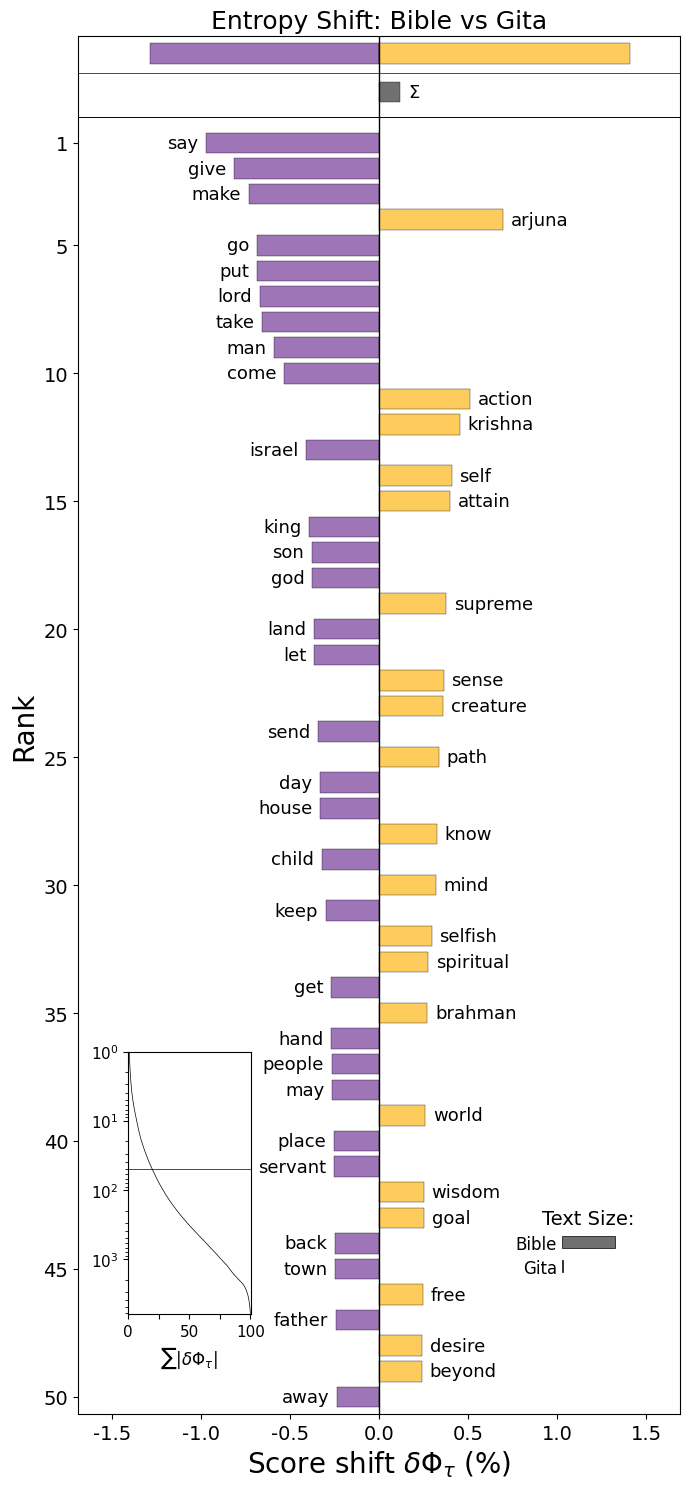

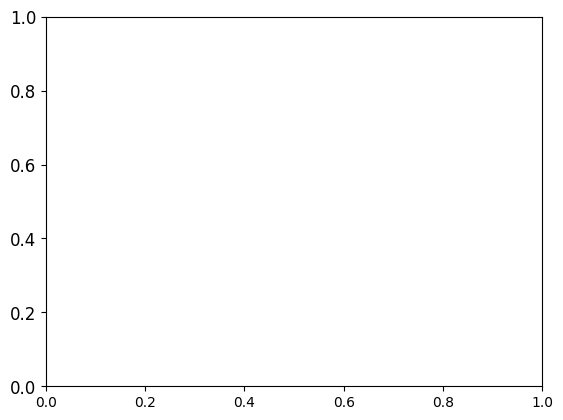

In [ ]:
proportion_shift_gita_quran = sh.EntropyShift(
    type2freq_1=word_freq_bible,
    type2freq_2=word_freq_gita,
    base = 2
)

plt.figure(figsize=(14, 7))
proportion_shift_gita_quran.get_shift_graph(
    system_names=['Bible', 'Gita'],
    title='Entropy Shift: Bible vs Gita'
)

# Adjust the layout to ensure everything fits
plt.tight_layout()

# Fixing the y-axis label issue:
for tick in plt.gca().get_yticklabels():
    if hasattr(tick, 'set_fontsize'):  # Check if 'set_fontsize' method exists
        tick.set_fontsize(12)

# Show the plot
plt.show()


In [ ]:
pip install huggingface_hub==0.25.2

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 436.6/436.6 kB 6.3 MB/s eta 0:00:00
  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.26.2
    Uninstalling huggingface-hub-0.26.2:
      Successfully uninstalled huggingface-hub-0.26.2


In [ ]:
import compcor.corpus_metrics as corpus_metrics
from compcor.text_tokenizer_embedder import STTokenizerEmbedder

# Assuming Bible, Gita, and Quran are your DataFrames with a column 'text'
# If the column name is different, replace 'text' with the appropriate column name

setA = df_bible['t'].tolist()
setB = df_gita['Text'].tolist()
setC = df_quran['Verse'].tolist()

# Distance Calculations between the three corpora (DataFrames)
# distance = corpus_metrics.fid_distance(corpus1=setA, corpus2=setB)
# print("fid_distance (Bible vs Gita) = {}".format(distance))

# distance = corpus_metrics.fid_distance(corpus1=setA, corpus2=setC)
# print("fid_distance (Bible vs Quran) = {}".format(distance))

# distance = corpus_metrics.fid_distance(corpus1=setB, corpus2=setC)
# print("fid_distance (Gita vs Quran) = {}".format(distance))

# 3. MAUVE Distance (Diversity and Quality)
distance_mauve_A_B = corpus_metrics.mauve_distance(corpus1=setA, corpus2=setB)
print("mauve_distance (Bible vs Gita) = {}".format(distance_mauve_A_B))

distance_mauve_A_C = corpus_metrics.mauve_distance(corpus1=setA, corpus2=setC)
print("mauve_distance (Bible vs Quran) = {}".format(distance_mauve_A_C))

distance_mauve_B_C = corpus_metrics.mauve_distance(corpus1=setB, corpus2=setC)
print("mauve_distance (Gita vs Quran) = {}".format(distance_mauve_B_C))

mauve_distance (Bible vs Gita) = 0.9210965333408224
mauve_distance (Bible vs Quran) = 0.9296553181276956
mauve_distance (Gita vs Quran) = 0.9711813936121848


In [ ]:
# 5. Chi-squared Distance (Token Count Comparison)
distance_chi_square_A_B = corpus_metrics.chi_square_distance(corpus1=setA, corpus2=setB)
print("chi_square_distance (Bible vs Gita) = {}".format(distance_chi_square_A_B))

distance_chi_square_A_C = corpus_metrics.chi_square_distance(corpus1=setA, corpus2=setC)
print("chi_square_distance (Bible vs Quran) = {}".format(distance_chi_square_A_C))

distance_chi_square_B_C = corpus_metrics.chi_square_distance(corpus1=setB, corpus2=setC)
print("chi_square_distance (Gita vs Quran) = {}".format(distance_chi_square_B_C))

NameError: name 'corpus_metrics' is not defined

In [ ]:
import compcor.corpus_metrics as corpus_metrics
from compcor.text_tokenizer_embedder import STTokenizerEmbedder

embedder = STTokenizerEmbedder(embedding_model_name="all-MiniLM-L12-v2")

# 2. Generate embeddings for the three corpora
embeddingA = embedder.embed_sentences(setA)
embeddingB = embedder.embed_sentences(setB)
embeddingC = embedder.embed_sentences(setC)

# 3. Compute the average embeddings for each corpus
average_embeddingA = np.mean(embeddingA, axis=0)
average_embeddingB = np.mean(embeddingB, axis=0)
average_embeddingC = np.mean(embeddingC, axis=0)

# 4. Compute distances between the average embeddings

# 1. FID Distance (Frechet Inception Distance)
distance_fid_A_B = corpus_metrics.fid_distance(corpus1=average_embeddingA, corpus2=average_embeddingB)
print("fid_distance (Bible vs Gita) = {}".format(distance_fid_A_B))

distance_fid_A_C = corpus_metrics.fid_distance(corpus1=average_embeddingA, corpus2=average_embeddingC)
print("fid_distance (Bible vs Quran) = {}".format(distance_fid_A_C))

distance_fid_B_C = corpus_metrics.fid_distance(corpus1=average_embeddingB, corpus2=average_embeddingC)
print("fid_distance (Gita vs Quran) = {}".format(distance_fid_B_C))

# 2. DC Distance (Density and Coverage)
distance_dc_A_B = corpus_metrics.dc_distance(corpus1=average_embeddingA, corpus2=average_embeddingB)
print("dc_distance (Bible vs Gita) = {}".format(distance_dc_A_B))

distance_dc_A_C = corpus_metrics.dc_distance(corpus1=average_embeddingA, corpus2=average_embeddingC)
print("dc_distance (Bible vs Quran) = {}".format(distance_dc_A_C))

distance_dc_B_C = corpus_metrics.dc_distance(corpus1=average_embeddingB, corpus2=average_embeddingC)
print("dc_distance (Gita vs Quran) = {}".format(distance_dc_B_C))

# 3. MAUVE Distance (Diversity and Quality)
distance_mauve_A_B = corpus_metrics.mauve_distance(corpus1=average_embeddingA, corpus2=average_embeddingB)
print("mauve_distance (Bible vs Gita) = {}".format(distance_mauve_A_B))

distance_mauve_A_C = corpus_metrics.mauve_distance(corpus1=average_embeddingA, corpus2=average_embeddingC)
print("mauve_distance (Bible vs Quran) = {}".format(distance_mauve_A_C))

distance_mauve_B_C = corpus_metrics.mauve_distance(corpus1=average_embeddingB, corpus2=average_embeddingC)
print("mauve_distance (Gita vs Quran) = {}".format(distance_mauve_B_C))

# 4. t-test Distance (Element-wise Mean Comparison)
distance_ttest_A_B = corpus_metrics.ttest_distance(corpus1=average_embeddingA, corpus2=average_embeddingB)
print("ttest_distance (Bible vs Gita) = {}".format(distance_ttest_A_B))

distance_ttest_A_C = corpus_metrics.ttest_distance(corpus1=average_embeddingA, corpus2=average_embeddingC)
print("ttest_distance (Bible vs Quran) = {}".format(distance_ttest_A_C))

distance_ttest_B_C = corpus_metrics.ttest_distance(corpus1=average_embeddingB, corpus2=average_embeddingC)
print("ttest_distance (Gita vs Quran) = {}".format(distance_ttest_B_C))

NameError: name 'np' is not defined

In [ ]:
import numpy as np

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

average_embeddingA = np.mean(embeddingA, axis=0)
average_embeddingB = np.mean(embeddingB, axis=0)
average_embeddingC = np.mean(embeddingC, axis=0)

average_embeddingA = average_embeddingA.reshape(1, -1)
average_embeddingB = average_embeddingB.reshape(1, -1)
average_embeddingC = average_embeddingC.reshape(1, -1)

# Compute cosine similarities
cosine_sim_A_B = cosine_similarity(average_embeddingA, average_embeddingB)[0][0]
cosine_sim_A_C = cosine_similarity(average_embeddingA, average_embeddingC)[0][0]
cosine_sim_B_C = cosine_similarity(average_embeddingB, average_embeddingC)[0][0]

# Print the results
print("Cosine similarity (Bible vs Gita) = {:.4f}".format(cosine_sim_A_B))
print("Cosine similarity (Bible vs Quran) = {:.4f}".format(cosine_sim_A_C))
print("Cosine similarity (Gita vs Quran) = {:.4f}".format(cosine_sim_B_C))


Cosine similarity (Bible vs Gita) = 0.7278
Cosine similarity (Bible vs Quran) = 0.8980
Cosine similarity (Gita vs Quran) = 0.7757


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.cluster import KMeans

num_clusters = 5  # You can choose a different number of clusters based on corpus size
kmeans_A = KMeans(n_clusters=num_clusters, random_state=42).fit(embeddingA)
kmeans_B = KMeans(n_clusters=num_clusters, random_state=42).fit(embeddingB)
kmeans_C = KMeans(n_clusters=num_clusters, random_state=42).fit(embeddingC)

# Step 3: Find centroids of the clusters
centroids_A = kmeans_A.cluster_centers_
centroids_B = kmeans_B.cluster_centers_
centroids_C = kmeans_C.cluster_centers_

# Step 4: Compare centroids using cosine similarity and Euclidean distance
def compare_centroids(centroids1, centroids2):
    similarities = []
    for centroid1 in centroids1:
        for centroid2 in centroids2:
            similarity = cosine_similarity(centroid1.reshape(1, -1), centroid2.reshape(1, -1))[0][0]
            similarities.append(similarity)
    avg_similarity = np.mean(similarities)
    return avg_similarity

# Compute pairwise centroid similarities
cosine_sim_A_B = compare_centroids(centroids_A, centroids_B)
cosine_sim_A_C = compare_centroids(centroids_A, centroids_C)
cosine_sim_B_C = compare_centroids(centroids_B, centroids_C)

print("Average cosine similarity (Bible vs Gita) = {:.4f}".format(cosine_sim_A_B))
print("Average cosine similarity (Bible vs Quran) = {:.4f}".format(cosine_sim_A_C))
print("Average cosine similarity (Gita vs Quran) = {:.4f}".format(cosine_sim_B_C))

# Optionally, compute Euclidean distances
def compare_centroids_euclidean(centroids1, centroids2):
    distances = []
    for centroid1 in centroids1:
        for centroid2 in centroids2:
            distance = euclidean_distances(centroid1.reshape(1, -1), centroid2.reshape(1, -1))[0][0]
            distances.append(distance)
    avg_distance = np.mean(distances)
    return avg_distance

euclidean_dist_A_B = compare_centroids_euclidean(centroids_A, centroids_B)
euclidean_dist_A_C = compare_centroids_euclidean(centroids_A, centroids_C)
euclidean_dist_B_C = compare_centroids_euclidean(centroids_B, centroids_C)

print("Average Euclidean distance (Bible vs Gita) = {:.4f}".format(euclidean_dist_A_B))
print("Average Euclidean distance (Bible vs Quran) = {:.4f}".format(euclidean_dist_A_C))
print("Average Euclidean distance (Gita vs Quran) = {:.4f}".format(euclidean_dist_B_C))

Average cosine similarity (Bible vs Gita) = 0.5423
Average cosine similarity (Bible vs Quran) = 0.7035
Average cosine similarity (Gita vs Quran) = 0.6226
Average Euclidean distance (Bible vs Gita) = 0.5284
Average Euclidean distance (Bible vs Quran) = 0.4170
Average Euclidean distance (Gita vs Quran) = 0.4911
